In [23]:
# 1️⃣ Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [24]:
# Enable display of all columns
pd.set_option('display.max_columns', None)

In [25]:
# Set seaborn style for better visuals
sns.set_style('whitegrid')

In [26]:
file_path = 'netflix_titles.csv'
df = pd.read_csv(file_path)

In [27]:
# Display the first 5 rows to get an overview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
# 3️⃣ Dataset Overview & Basic Inspection
print("\n✅ Dataset Shape (rows, columns):", df.shape)



✅ Dataset Shape (rows, columns): (8807, 12)


In [29]:
print("\n✅ Dataset Information:")
df.info()


✅ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
print("\n✅ Columns with Missing Values:")
print(df.isnull().sum())


✅ Columns with Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [31]:
print("\n✅ Number of Duplicate Records:", df.duplicated().sum())


✅ Number of Duplicate Records: 0


In [32]:
# Example: Fill missing 'director' & 'cast' with 'Unknown'
for col in ['director', 'cast']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [33]:
# Example: Fill missing categorical data with 'Unknown'
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna('Unknown')

In [34]:
# Example: Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

In [35]:
df.dropna(thresh=5, inplace=True)

In [36]:
# Convert to numeric
df['duration_numeric'] = pd.to_numeric(df['duration'], errors='coerce')

# Perform the division and rounding
df['duration_hours'] = np.round(df['duration_numeric'] / 60, 2)

# Check result
print(df[['duration', 'duration_numeric', 'duration_hours']].head())


    duration  duration_numeric  duration_hours
0     90 min               NaN             NaN
1  2 Seasons               NaN             NaN
2   1 Season               NaN             NaN
3   1 Season               NaN             NaN
4  2 Seasons               NaN             NaN


In [37]:
# 3️⃣ Fill missing 'rating' with mean rating
mean_rating = np.nanmean(pd.to_numeric(df['rating'], errors='coerce'))
df['rating_filled'] = pd.to_numeric(df['rating'], errors='coerce').fillna(mean_rating)

C:\Users\nihal\AppData\Local\Temp\ipykernel_19628\2898369824.py:2: RuntimeWarning: Mean of empty slice
  mean_rating = np.nanmean(pd.to_numeric(df['rating'], errors='coerce'))


In [38]:
# 5️⃣ Clip 'duration' values to be between 0 and 300 (to remove outliers)
df['duration_clipped'] = np.clip(pd.to_numeric(df['duration'], errors='coerce'), 0, 300)

In [39]:
print("\n✅ Missing Values After Cleaning:")
print(df.isnull().sum())


✅ Missing Values After Cleaning:
show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0
duration_numeric    8807
duration_hours      8807
rating_filled       8807
duration_clipped    8807
dtype: int64


In [40]:
# 5️⃣ Removing Duplicate Records
print("\n✅ Removing Duplicates...")
df.drop_duplicates(inplace=True)
print("Remaining Records After Removing Duplicates:", df.shape)


✅ Removing Duplicates...
Remaining Records After Removing Duplicates: (8807, 16)


In [41]:
# 6️⃣ Correcting Data Types
# Example: Convert 'date_added' to datetime
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Example: Ensure numeric-like columns are numeric
if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [42]:
# Display updated data types
print("\n✅ Updated Data Types:")
print(df.dtypes)



✅ Updated Data Types:
show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
duration_numeric           float64
duration_hours             float64
rating_filled              float64
duration_clipped           float64
dtype: object


In [43]:
# 8.1 Summary Statistics
print("\n✅ Summary Statistics for Numeric Columns:")
print(df.describe())


✅ Summary Statistics for Numeric Columns:
                          date_added  release_year  duration_numeric  \
count                           8709   8807.000000               0.0   
mean   2019-05-23 01:45:29.452290816   2014.180198               NaN   
min              2008-01-01 00:00:00   1925.000000               NaN   
25%              2018-04-20 00:00:00   2013.000000               NaN   
50%              2019-07-12 00:00:00   2017.000000               NaN   
75%              2020-08-26 00:00:00   2019.000000               NaN   
max              2021-09-25 00:00:00   2021.000000               NaN   
std                              NaN      8.819312               NaN   

       duration_hours  rating_filled  duration_clipped  
count             0.0            0.0               0.0  
mean              NaN            NaN               NaN  
min               NaN            NaN               NaN  
25%               NaN            NaN               NaN  
50%               NaN  

C:\Users\nihal\AppData\Local\Temp\ipykernel_19628\450270923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


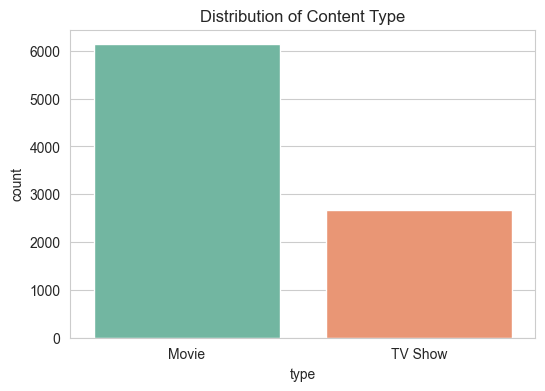

In [44]:
# 8.2 Distribution of Categorical Columns (Example: 'type' and 'rating' for Netflix)
if 'type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='type', palette='Set2')
    plt.title('Distribution of Content Type')
    plt.show()

C:\Users\nihal\AppData\Local\Temp\ipykernel_19628\1226821955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='pastel')


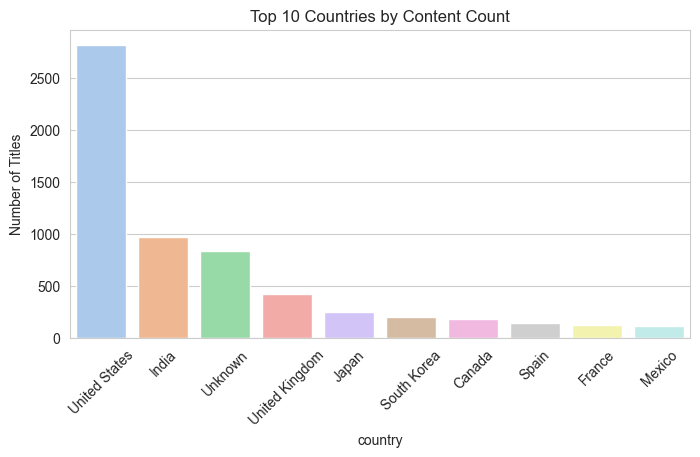

In [45]:
# 8.3 Titles by Country (Top 10)
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_countries.index, y=top_countries.values, palette='pastel')
    plt.xticks(rotation=45)
    plt.title('Top 10 Countries by Content Count')
    plt.ylabel('Number of Titles')
    plt.show()

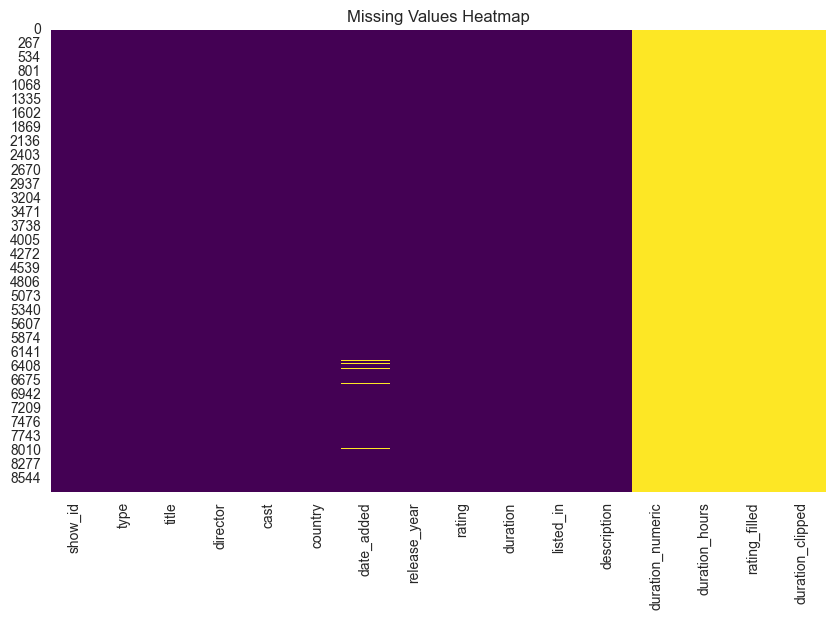

In [46]:
# 9️⃣ Visualizations of Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


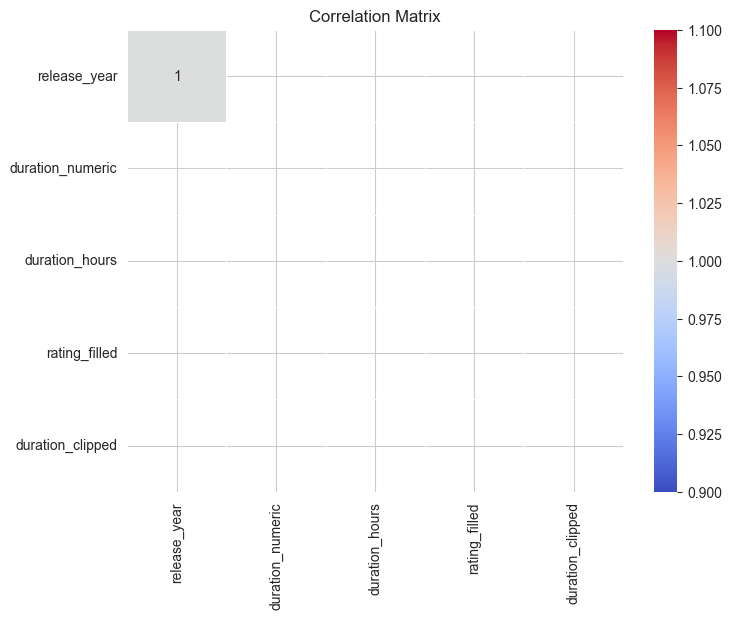

In [47]:
# 🔟 Correlation Analysis (for numeric columns)
numeric_df = df.select_dtypes(include=np.number)
if not numeric_df.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

In [48]:
# Example: Encode 'type' and 'rating' columns for Netflix
for col in ['type', 'rating']:
    if col in df.columns:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])

print("\n✅ Encoded Columns Sample:")
encoded_cols = [col for col in df.columns if '_encoded' in col]
print(df[encoded_cols].head())


✅ Encoded Columns Sample:
   type_encoded  rating_encoded
0             0               7
1             1              11
2             1              11
3             1              11
4             1              11


In [49]:
#1️⃣2️⃣ Save the Cleaned Dataset
output_file = 'cleaned_dataset.csv'
df.to_csv(output_file, index=False)
print(f"\n✅ Cleaned Dataset Saved as '{output_file}'")

# --------------------------------------------------------------------------------
# 🟩 Final Summary
print("\n🔍 Final Dataset Shape:", df.shape)
print("\n🔍 Final Columns:\n", df.columns)
print("\n🔍 Final Dataset Preview:\n")
print(df.head())


✅ Cleaned Dataset Saved as 'cleaned_dataset.csv'

🔍 Final Dataset Shape: (8807, 18)

🔍 Final Columns:
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_numeric', 'duration_hours', 'rating_filled',
       'duration_clipped', 'type_encoded', 'rating_encoded'],
      dtype='object')

🔍 Final Dataset Preview:

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   